Wave equation
==

We are seeking the solution for equation
$$\frac{\partial^2 u}{\partial t^2} = c^2\frac{\partial^2 u}{\partial x^2}$$

In [1]:
%matplotlib inline
from pylab import *
from numpy import *

In [2]:
#dimensions of the computational domain:
maxx = 10.
maxt = 40.

#wave velocity
v = 0.5

We discretize the simulation domain:
$$t_n = t_0 + n\Delta t$$
$$x_i = x_0 + i\Delta x$$
and seek for the numerical approximation $U^n_i$ to the actual solution $U(t_n, x_i)$ on the grid points

In [3]:
#discretization parameters
nx = 100   # number of unknown grid points in spatial direction
CFL = 1.0  # Courant Friedrichs Lewy (CFL) condition v*dt/dx

def wave_init(maxx, maxt, v, nx, CFL):
    #choose time step according to CFL condition
    dx = maxx/(nx+1)
    dt = CFL*dx/v
    nt = int(maxt/dt)+1
    
    #define array for storing the solution
    U = zeros((nt, nx+2))
    
    x = arange(nx+2)*dx
    t = arange(nt)*dt
    return U, dx, dt, x, t

We may replace the derivatives in wave equation by second differences in the following way
$$\frac{U^{n-1}_i - 2U^n_i + U^{n+1}_i}{\Delta t^2} = c^2\frac{U^n_{i-1} - 2U^n_i + U^n_{i+1}}{\Delta x^2}$$
to obtain explicit equation for propagation in time:
$$U^{n+1}_i = 2U^n_i - U^{n-1}_i + \frac{c^2\Delta t^2}{\Delta x^2} (U^n_{i-1} - 2U^n_i + U^n_{i+1}).$$
We define a function for propagating the solution over the array U, assuming that U[0:2, xint] is the initial condition and U[:,[0,-1]] are the boundary conditions.

In [4]:
def wave_solve(U, dx, dt, nx, nt):
    xint = arange(1, nx+1)
    for it in range(1,nt-1):
        d2x = U[it, xint-1] - 2*U[it, xint] + U[it, xint+1]
        U[it+1,xint] = 2*U[it,xint] - U[it-1, xint] + d2x/dx**2*dt**2*v**2

In [5]:
U, dx, dt, x, t = wave_init(maxx, maxt, v, nx, CFL*1)

In [6]:
# use gaussian pulse as initial condition
U0 = exp(-(x-maxx/3)**2/2.)*2
U[0,:] = U0
U[1,:] = U0

In [7]:
wave_solve(U, dx, dt, nx, len(t))

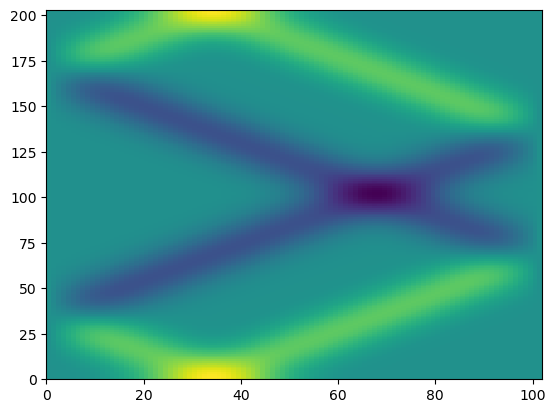

In [8]:
pcolormesh(U, rasterized=True, vmin=-2, vmax=2)

What happens if the CFL condition is violated by a small relative amount, say $10^{-3}$?

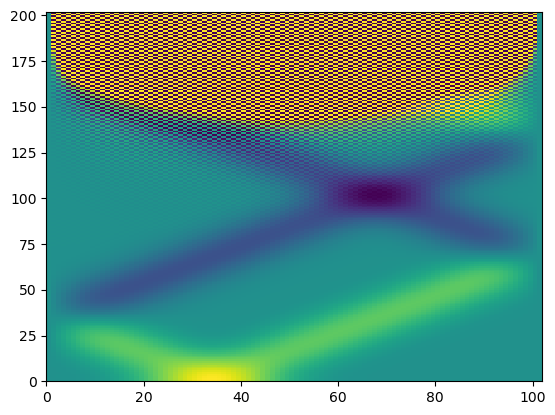

In [9]:
CFL = 1.001
U, dx, dt, x, t = wave_init(maxx, maxt, v, nx, CFL)
U0 = exp(-(x-maxx/3)**2/2.)*2
U[0,:] = U0
U[1,:] = U0
wave_solve(U, dx, dt, nx, len(t))
pcolormesh(U, rasterized=True, vmin=-2, vmax=2)

The unstable high-frequency oscillations quickly grow larger that the solution of interest 

We may also animate the solution. Let us first recalculate with correct CFL condition:

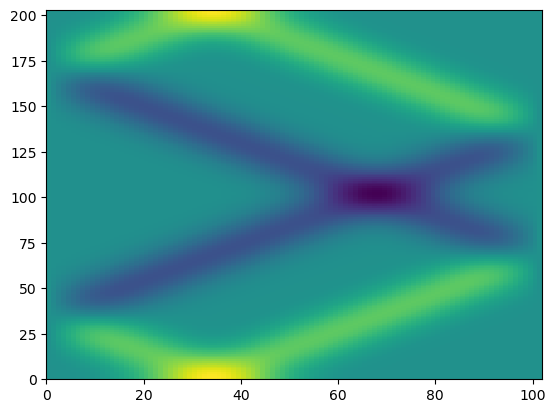

In [10]:
CFL = 1.
U, dx, dt, x, t = wave_init(maxx, maxt, v, nx, CFL)
U0 = exp(-(x-maxx/3)**2/2.)*2
U[0,:] = U0
U[1,:] = U0
wave_solve(U, dx, dt, nx, len(t))
pcolormesh(U, rasterized=True, vmin=-2, vmax=2)

In [11]:
#let's take every 10th frame into animation
Un = U[:-10:10,:]

In [12]:
plt.ioff()
from matplotlib import animation
#from matplotlib.animation import FuncAnimation
#from JSAnimation.IPython_display import display_animation

In [13]:
plt.rcParams["animation.html"] = "jshtml"
#%matplotlib notebook
fig = figure();
ax = axes(xlim=(0,maxx),ylim=(-3,3));
line, = ax.plot([],[],lw=2);

def animate(data):
    line.set_data(x,data)
    return line,

animation.FuncAnimation(fig, animate, frames=Un, interval=100)

Implementing time-dependent boundary conditions is simple. For example, vibrating with one end of the string looks like:

In [14]:
plt.ion()
plt.clf()

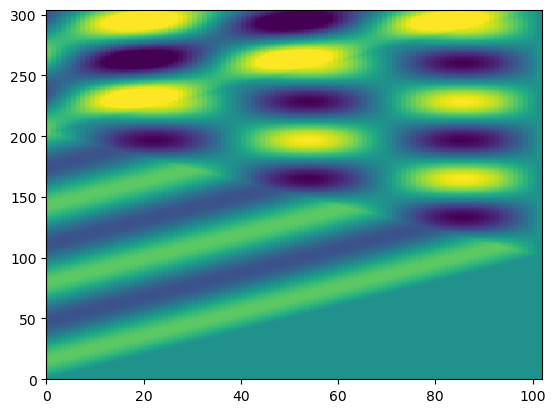

In [15]:
maxt=60.
U, dx, dt, x, t = wave_init(maxx, maxt, v, nx, CFL)
U[0,:] = 0
U[1,:] = 0
U[:,0] = sin(t*0.5)
wave_solve(U, dx, dt, nx, len(t))
pcolormesh(U, rasterized=True, vmin=-2, vmax=2)
plt.show()